<a href="https://colab.research.google.com/github/Oxirane-git/Multi-Class-Image-Classification./blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-class image classification system that can identify objects across 5 distinct catagories.**


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving Training_set.zip to Training_set.zip
User uploaded file "Training_set.zip" with length 203682975 bytes


In [2]:

!unzip Training_set.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training_set/Dog/1633807559966_Shih Tzu Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807561972_Lion Shepherd Dog for sale.jpg  
  inflating: Training_set/Dog/1633807563645_Labrador Brown Female Puppy for sale.jpg  
  inflating: Training_set/Dog/1633807584093_Terrier puppies for sale.jpg  
  inflating: Training_set/Dog/1633807588650_Pomeranian Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807610793_Goldern Retriever Puppy for sale.jpg  
  inflating: Training_set/Dog/1633807612998_German Shepherd Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807613369_Pomeranian Mix Puppies for sale.jpg  
  inflating: Training_set/Dog/1633807613654_Puppies for Kind Homes for sale.jpg  
  inflating: Training_set/Dog/1633807613901_Dog for Kind Home for sale.jpg  
  inflating: Training_set/Dog/1633807633201_Rottweiler Dog for sale.jpg  
  inflating: Training_set/Dog/1633807634604_German Shepherd Dog for sale.jp

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/Training_set'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10759 images belonging to 5 classes.
Found 1896 images belonging to 5 classes.


In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(5, activation='softmax')  ])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 178s 502ms/step - accuracy: 0.4407 - loss: 1.2288 - val_accuracy: 0.4953 - val_loss: 1.1131
Epoch 2/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 163s 483ms/step - accuracy: 0.4757 - loss: 1.1135 - val_accuracy: 0.5332 - val_loss: 1.0410
Epoch 3/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 162s 480ms/step - accuracy: 0.5233 - loss: 1.0641 - val_accuracy: 0.5601 - val_loss: 1.0136
Epoch 4/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 163s 484ms/step - accuracy: 0.5638 - loss: 1.0045 - val_accuracy: 0.5633 - val_loss: 1.0116
Epoch 5/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 162s 480ms/step - accuracy: 0.6061 - loss: 0.9299 - val_accuracy: 0.5591 - val_loss: 1.0051
Epoch 6/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 161s 477ms/step - accuracy: 0.6355 - loss: 0.8894 - val_accuracy: 0.5897 - val_loss: 0.9700
Epoch 7/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 162s 481ms/step - accuracy: 0.6733 - loss: 0.7935 - val_accuracy: 0.6002 - val_loss: 0.9563
Epoch 8/15
337/337 ━━━━━━━━━━━━━━━━━━━━ 199s 472ms/step - accuracy: 0.6940 -

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 444ms/step
Validation Accuracy: 31.54%
Precision: 18.58%
Recall: 19.06%
F1-Score: 18.09%

Classification Report:

              precision    recall  f1-score   support

        Bird       0.16      0.33      0.22       331
         Cat       0.33      0.23      0.27       638
         Dog       0.44      0.39      0.41       870
        Fish       0.00      0.00      0.00        14
      Rabbit       0.00      0.00      0.00        43

    accuracy                           0.32      1896
   macro avg       0.19      0.19      0.18      1896
weighted avg       0.34      0.32      0.32      1896



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

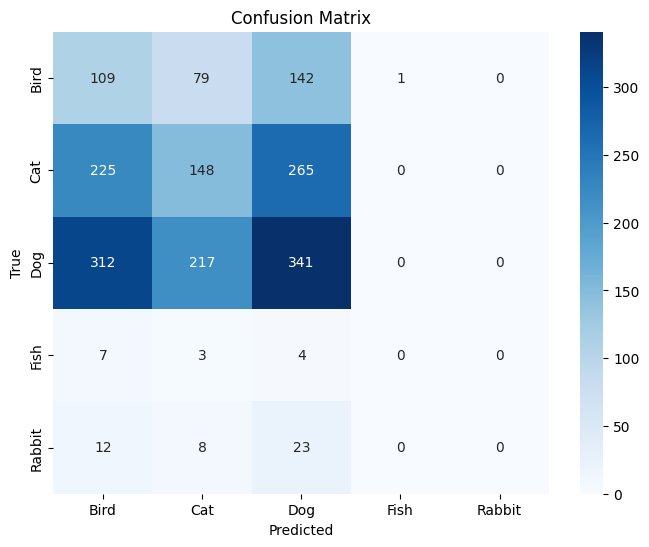

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = cnn_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = val_generator.classes

accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_generator.class_indices.keys()),
            yticklabels=list(val_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


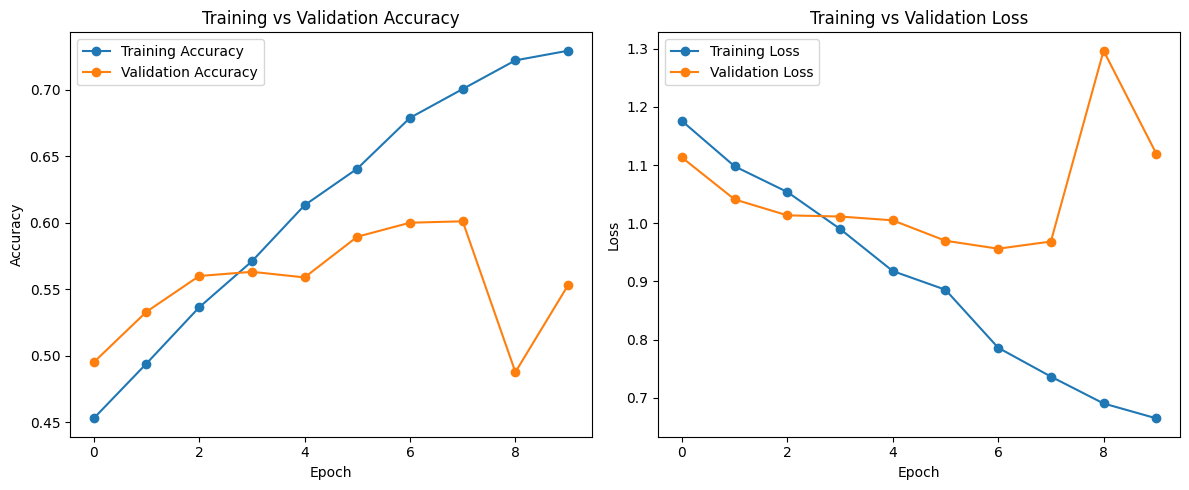

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Training Loss', marker='o')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
